In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ___Classifier Decision Functions___
------------------

In [3]:
# Many classifiers in sklearn can provide information about the uncertainty associated with the predictions made by them.
# This can be accomplished by either the .decision_function() method or .predict_proba() method.

In [4]:
# Using the decision_function, given a set of test points, it can show how confidently the classifier predicts the positive class or the 
# negative class.

In [5]:
# predict_proba function provides the predicted probabilities of class membership.
# A classifier will typicaly predict the most probable class.
# e.g. in a binary classifier, the class with > 0.5 threshold.

# Adjusting this threshold affects the predictions of the classifier.
# e.g. only predict class A when the estimated probability of class A > 0.9

# Higher thresholds result in a more conservative classifier.
# This increases precision.

In [6]:
# This types of probabilities aren't always dependable since highly overfitted models may provide overly optimistic probabilities.

In [31]:
digits = load_digits()

# Skewing the class distribution.
targets = np.array(list(map(lambda x: 0 if x == 0 else 1, digits.target)))

In [32]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
# Imbalanced classes

np.unique(targets, return_counts = True)

(array([0, 1]), array([ 178, 1619], dtype=int64))

In [64]:
train_x, test_x, train_y, test_y = train_test_split(digits.data, targets, train_size = 0.6)

In [65]:
# accuracy increases with generalization i.e C upto C = 1

svc = SVC(C = 0.001, kernel = "rbf", probability = True).fit(train_x, train_y)

In [66]:
svc.score(test_x, test_y)

0.8929068150208623

In [67]:
svc.predict_proba(test_x)

array([[2.71947102e-09, 9.99999997e-01],
       [1.08093503e-09, 9.99999999e-01],
       [1.55076237e-08, 9.99999984e-01],
       ...,
       [1.85255489e-06, 9.99998147e-01],
       [9.99950109e-01, 4.98907533e-05],
       [1.69244569e-09, 9.99999998e-01]])

In [74]:
svc.predict_proba(test_x).shape

(719, 2)

In [114]:
svc.predict_proba(test_x)

array([[2.71947102e-09, 9.99999997e-01],
       [1.08093503e-09, 9.99999999e-01],
       [1.55076237e-08, 9.99999984e-01],
       ...,
       [1.85255489e-06, 9.99998147e-01],
       [9.99950109e-01, 4.98907533e-05],
       [1.69244569e-09, 9.99999998e-01]])

In [112]:
svc.predict(test_x).sum()

719

In [113]:
svc.score(test_x, test_y)

0.8929068150208623

In [115]:
np.argmax(svc.predict_proba(test_x) - 0.7, axis = 1).sum()

643

In [94]:
svc.decision_function(test_x)[:10]

array([1.00708486, 1.00776677, 1.00579816, 1.00398071, 1.00686064,
       1.00799935, 1.00461809, 1.00268974, 1.00707468, 1.00254373])

In [69]:
# class labels learned by the classifier.

svc.classes_

array([0, 1])

In [122]:
# If we increase the prediction probability threshold to 80% instead of the default 50% of the binary classifiers,
# label 1 will be selected only when the classifier can assertain that the prediction has at least 80% confidence

np.array(list(map(lambda lst: 1 if (lst[1] > 0.9) else 0, svc.predict_proba(test_x))))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [123]:
test_x.shape, test_y.shape

((719, 64), (719,))

In [135]:
# 1 is the label with highest frequency.
ascores = []

for prob in np.arange(0.01, 1, step = 0.01):
    preds = np.array(list(map(lambda lst: 1 if (lst[1] > prob) else 0, svc.predict_proba(test_x))))
    labels, counts = np.unique(preds, return_counts = True)
    ascore = accuracy_score(test_y, preds)
    ascores.append((prob, ascore))
    print(f"Proportion of predicted 1 labels {counts[1] / sum(counts):.4f} Accuracy score {ascore} @threshold {prob:.3f}")

Proportion of predicted 1 labels 0.9026 Accuracy score 0.9902642559109874 @threshold 0.010
Proportion of predicted 1 labels 0.8999 Accuracy score 0.9930458970792768 @threshold 0.020
Proportion of predicted 1 labels 0.8999 Accuracy score 0.9930458970792768 @threshold 0.030
Proportion of predicted 1 labels 0.8999 Accuracy score 0.9930458970792768 @threshold 0.040
Proportion of predicted 1 labels 0.8999 Accuracy score 0.9930458970792768 @threshold 0.050
Proportion of predicted 1 labels 0.8999 Accuracy score 0.9930458970792768 @threshold 0.060
Proportion of predicted 1 labels 0.8985 Accuracy score 0.9944367176634215 @threshold 0.070
Proportion of predicted 1 labels 0.8971 Accuracy score 0.9958275382475661 @threshold 0.080
Proportion of predicted 1 labels 0.8971 Accuracy score 0.9958275382475661 @threshold 0.090
Proportion of predicted 1 labels 0.8971 Accuracy score 0.9958275382475661 @threshold 0.100
Proportion of predicted 1 labels 0.8971 Accuracy score 0.9958275382475661 @threshold 0.110

In [137]:
ascores = np.array(ascores)

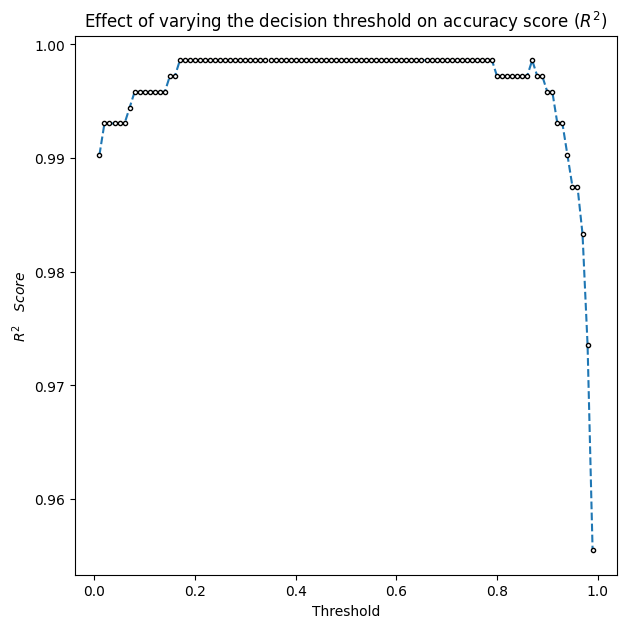

In [156]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.plot(ascores[:, 0], ascores[:, 1], mfc = "white", mec = "black", linestyle = "--", marker = "o", ms = 3)
axes.set_xlabel("Threshold")
axes.set_ylabel("$R^{2}\hspace{1}Score$")
axes.set_title("Effect of varying the decision threshold on accuracy score ($R^{2}$)")
plt.show()

In [ ]:
# recall = 